## ABA and DT Correlation

**Identify potential correlations between the cohorts of ABA patients with Developmental Therapies (SLP,OT,PT,MT) and the cohort of ABA only without Developmental Therapies**


In [1]:
##import libraries
import pyodbc 
import pandas as pd 
import boto3 
import numpy as np
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
#pd.options.display.max_columns = None
#pd.options.display.width=None
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile


In [3]:
cnxn_dev = pyodbc.connect("DSN=AWS_DEV") # Call connection using name of DSN setup in ODBC 
appt_df = pd.read_sql('SELECT * FROM "corticadatamodel"."booked_fact" ',cnxn_dev)
patdm_df = pd.read_sql('SELECT * FROM "corticadatamodel"."patient_dm" ',cnxn_dev)
vineland_df = pd.read_sql('SELECT * FROM "vineland"."analysis_file_csv" ',cnxn_dev)
servcat_df = pd.read_sql('SELECT * FROM "corticadatamodel"."service_category_dm"  ',cnxn_dev)


In [20]:
cnxn_dev = pyodbc.connect("DSN=AWS_DEV") # Call connection using name of DSN setup in ODBC 
#appt_df = pd.read_sql('SELECT * FROM "corticadatamodel"."booked_fact" ',cnxn_dev)
patdm_df = pd.read_sql('SELECT * FROM "corticadatamodel"."patient_dm" ',cnxn_dev)


In [46]:
df=df.rename(columns={'phenotype':'notes_phenotype'})

In [60]:
vineland_df
def extract_categorical_features(df,n_levels,target):
    cols=df.columns
    num_cols=df._get_numeric_data().keys()
    cat_col=list(set(cols) - set(num_cols))
    cat_col.remove(target)
    A={}
    for cl in cat_col:
        m=len(list(df['gender'].unique()))
        if m> n_levels:
            A[cl]=m
            
            return {k: v for k, v in sorted(A.items(), key=lambda item: item[1])}
    
extract_categorical_features(vineland_df,0,'gender')  

{'domains': 2}

In [ ]:
vineland_df.dtypes[vineland_df.dtypes==object]
vineland_df['domain'].astype('float64')

In [88]:
def clean_price_column(df,column):
        df.fillna(0)
        df[df.applymap(np.isreal)][column]
        df[column]=df[column].astype('float64')
        return df[column]
        
clean_price_column(vineland_df,'communication')






In [106]:
def category_with_highest_average(df,cat_column,num_column):
    return df.groupby(cat_column)[num_column].mean().sort_values(ascending=False).index[0]
category_with_highest_average(vineland_df,'gender','communication')

'Male'

In [29]:

import datetime
from datetime import date
import pandas as pd
def calculate_days_listed(airbnb):
    airbnb['test date']=pd.to_datetime(airbnb['test date'])
    pr=airbnb['test date']-datetime.datetime(2019,2,12)
    airbnb['days_listed']=pr/np.timedelta64(1,'D')
    return airbnb
calculate_days_listed(vineland_df)

,name,gender,dob,test date,abc_composite,communication,daily_living_skills,domains,motor_skills,socialization,days_listed
0,Aadya_Bhamidim,Female,2016-08-21,2020-06-19,61.0,47.0,59.0,,65.0,66.0,493.0
1,Aaliyah_Uddin,Female,2015-02-06,2020-06-01,39.0,24.0,45.0,,25.0,34.0,475.0
2,Aaliyah_Uddin,Female,2015-02-06,2020-11-03,39.0,24.0,45.0,,39.0,32.0,630.0
3,Aarav_Agrawal,Male,2009-02-01,2020-10-13,53.0,55.0,50.0,,NaN,36.0,609.0
4,Aarjun_Malhotra,Male,2010-07-24,2020-04-30,77.0,80.0,84.0,,76.0,72.0,443.0
...,...,...,...,...,...,...,...,...,...,...,...
614,Zayd_Mohammed,Male,2016-01-23,2020-08-24,82.0,88.0,84.0,,78.0,82.0,559.0
615,Zelda_Arradaza,Female,2016-07-27,2020-10-15,70.0,70.0,70.0,,76.0,72.0,611.0
616,Zephyr_Yao,Male,2016-08-06,2020-03-03,103.0,100.0,108.0,,105.0,101.0,385.0
617,Zhijian_Xi,Male,2001-05-01,2020-11-15,24.0,23.0,20.0,,NaN,27.0,642.0


In [2]:
cnxn_dev = pyodbc.connect("DSN=AWS_DEV") # Call connection using name of DSN setup in ODBC 

appt_df = pd.read_sql('SELECT * FROM "corticadatamodel"."booked_fact" ',cnxn_dev)


In [4]:
appt_df.keys()

Index(['appointment_id', 'appointment_date', 'appointment_create_date',
       'appointment_modified_date', 'provider_name', 'provider_id',
       'provider_fk', 'client_name', 'client_id', 'client_fk', 'client_clinic',
       'client_clinic_fk', 'provider_clinic', 'provider_clinic_fk',
       'appt_clinic', 'appt_clinic_fk', 'appointment_type_name',
       'appointment_name', 'place_of_service_code', 'place_of_service',
       'billable', 'is_telehealth', 'start_time', 'end_time', 'hours',
       'minutes', 'week_end_date', 'source', 'service_category_fk',
       'appointment_category_fk', 'cancelled_date', 'cancelled_by', 'note',
       'claim_or_bill_id', 'appt_status', 'wrvu', 'missing_slip'],
      dtype='object')

In [4]:
vineland_df['dob']=pd.to_datetime(vineland_df['dob'])
vineland_df["name"]=vineland_df["name"].str.upper()

appt_df["client_name"]=appt_df["client_name"].str.upper()
appt_df['appointment_date']=pd.to_datetime(appt_df['appointment_date'])
appt_df['client_fk']=appt_df['client_fk'].astype('float64')
appt_df=appt_df[appt_df['appointment_date']<pd.to_datetime('2021/01/01')] # exclude recent appointments

patdm_df['first_name']=patdm_df['first_name'].str.upper()
patdm_df['last_name']=patdm_df['last_name'].str.upper()
patdm_df['name']=patdm_df.first_name.map(str) + "_" + patdm_df.last_name.map(str)
patdm_df.drop(['first_name','last_name'],axis=1,inplace=True)

**Include active appointment, exclude recent appointments and find ABA appointments**

In [5]:
appt_df=appt_df[appt_df['appt_status'].isin(['4 - Charge Entered','3 - Checked Out','2 - Checked In','Active'])] # all active appointments

app_srv=pd.merge(appt_df,servcat_df[['hours_category','service_category_id']], left_on='service_category_fk', right_on='service_category_id')

app_srv.loc[(app_srv['hours_category']=='Direct') & (app_srv['source']=='Central Reach'), 'appointment_type_name'] = 'ABA'


In [12]:
servcat_df.keys()

Index(['service_category_id', 'hours_category', 'hrs_category_abbrev',
       'billable', 'service_code_id', 'service_category',
       'service_code_description'],
      dtype='object')

##  Find pateints with parent training

## Find All appointments for each patients

In [6]:
parter=app_srv.groupby(['client_fk'])['hours_category'].unique().reset_index()
parter['has_training']=False

def find_train(x,y):
    a=x['hours_category']
    items = set(list(a))
    return bool(set(items) & set(y))

Has_Train=parter.apply(lambda x: find_train(x,{'Parent Training'}),axis=1) 
parter[Has_Train]['has_training']=True  # patients has Parent Training

parter[Has_Train] = parter[Has_Train].assign(has_training=True)


In [28]:
All_TR=app_srv.groupby(['client_fk'])['appointment_type_name'].unique().reset_index() # therapies for each patient

In [51]:
tmp[]=app_srv.groupby(['client_fk'])['hours'].sum().reset_index()['hours']
app_srv.groupby(['client_fk'])['appointment_id'].count().reset_index()['appointment_id']




,client_fk,appointment_id
0,0.0,72003
1,420.0,3252
2,421.0,16
3,423.0,1671
4,424.0,23
...,...,...
2763,4762.0,1
2764,4766.0,1
2765,4772.0,1
2766,4777.0,1


In [44]:
app_srv.keys()

Index(['appointment_id', 'appointment_date', 'appointment_create_date',
       'appointment_modified_date', 'provider_name', 'provider_id',
       'provider_fk', 'client_name', 'client_id', 'client_fk', 'client_clinic',
       'client_clinic_fk', 'provider_clinic', 'provider_clinic_fk',
       'appt_clinic', 'appt_clinic_fk', 'appointment_type_name',
       'appointment_name', 'place_of_service_code', 'place_of_service',
       'billable', 'is_telehealth', 'start_time', 'end_time', 'hours',
       'minutes', 'week_end_date', 'source', 'service_category_fk',
       'appointment_category_fk', 'cancelled_date', 'cancelled_by', 'note',
       'claim_or_bill_id', 'appt_status', 'wrvu', 'missing_slip',
       'hours_category', 'service_category_id'],
      dtype='object')

## Find total hours of therapy(every therapy including aba)

In [29]:
All_TR=pd.merge(patdm_df,All_TR,left_on='athena_id',right_on='client_fk')



In [30]:
All_TR=pd.merge(parter[['client_fk','has_training']],All_TR,on='client_fk')

In [10]:
MT=set(['Eval - MT','MT','Cotreat: MT+ PT','Cotreat: MT + SLP','Cotreat: OT + MT','Cotreat: MT + SLP30'])
ABA=set(['ABA Reassessment','tele-ABA','ABA Group In Clinic','ABA In Clinic','ABA In Home','ABA at School','ABA Sub - In Clinic','ABA Sub - At School',
'ABA Telehealth','ABA Initial Assessment ','ABA PREP In Clinic','ABA Initial Assessment','ABA Sub - In Home'] )

OT_PT=set(['Eval - OT','PT','Cotreat: PT + OT','OT 90','OT','Cotreat: OT + SLP','COTA Supervision','Cotreat: MT+ PT','Cotreat: OT + MT','Cotreat: OT + SLP30','Cotreat: PT + SLP','OT (Feeding Therapy)'])
SLP=set(['Eval - SLP','Cotreat: MT + SLP','Cotreat: MT + SLP30','Cotreat: OT + SLP','Cotreat: OT + SLP30','Cotreat: PT + SLP','SLP','SLP (Feeding Therapy)','SLP 30','SLP Eval','SLPA Supervision'])
MED=set(['FOLLOW UP - Medical 15','FOLLOW UP - TELE','FOLLOW UP - TELE 30','NEURO EVAL- PHONE','Neuro Evaluation- No Bill (60)','Medical Follow Up - Initial','FOLLOW UP - Medical 30','FOLLOW UP - Medical 45','FOLLOW UP - TELE 15','FOLLOW UP - TELE 45','Medical Follow Up - No Bill','Medical- Web visit','NEURO EVAL- MD','Neurodevelopmental Evaluation'])
All_noABA_OT=set(list(MT)+list(SLP))

All_noABA_MT=set(list(OT_PT)+list(SLP))
All_noABA_SLP=set(list(OT_PT)+list(MT))
All_noABA_MED=set(list(OT_PT)+list(MT)+list(SLP))
All_noABA_OT=set(list(MT)+list(SLP))

All_noABA=set(list(OT_PT)+list(MT)+list(SLP))
ABA_DT=set(list(OT_PT)+list(MT)+list(SLP)+list(ABA))

## patients recieving ABA or DT

In [31]:
def find_T(x,y):
    a=x['appointment_type_name']
    items = set(list(a))
    return bool(set(items) & set(y))

Has_ABADT=All_TR.apply(lambda x: find_T(x,ABA_DT),axis=1) 
ABADT_TR=All_TR[Has_ABADT]  # patients recieving ABA or DT

In [32]:
All_TR.describe()

,client_fk,athena_id,total_appts_to_date
count,2768.000000,2768.000000,2755.000000
mean,2516.596098,2516.596098,75.105626
std,1193.879565,1193.879565,166.741748
min,0.000000,0.000000,1.000000
25%,1483.750000,1483.750000,4.000000
50%,2462.500000,2462.500000,17.000000
75%,3508.250000,3508.250000,73.000000
max,4779.000000,4779.000000,2753.000000


**Patient with ABA only**

In [42]:
All_TR.describe()

,client_fk,athena_id,total_appts_to_date
count,2768.000000,2768.000000,2755.000000
mean,2516.596098,2516.596098,75.105626
std,1193.879565,1193.879565,166.741748
min,0.000000,0.000000,1.000000
25%,1483.750000,1483.750000,4.000000
50%,2462.500000,2462.500000,17.000000
75%,3508.250000,3508.250000,73.000000
max,4779.000000,4779.000000,2753.000000


In [37]:
Has_ABA=All_TR.apply(lambda x: find_T(x,{'ABA'}),axis=1) 
ABA_TR=All_TR[Has_ABA]  # patients recieving ABA

tmp=ABA_TR.apply(lambda x:find_T(x,All_noABA),axis=1)
ABA_only=ABA_TR[tmp==False] # Pateints receiving ABA only
ABA_only['TP category']='ABA only'

In [53]:
ABA_TR.shape

(495, 26)

## ABA only vs ABA_DT stat

In [54]:

ABA_DT=ABA_TR[~ABA_TR.isin(ABA_only)].dropna(how = 'all') # Patients recieving ABA and DT 
ABA_DT['TP category']='ABA+DT'
Stat_ABA_DT=ABA_only.append(ABA_DT).reset_index()

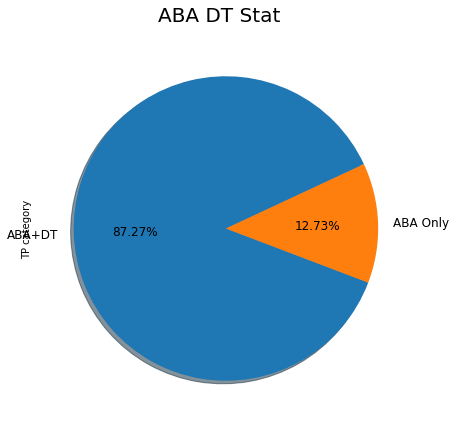

In [38]:



f, ax = plt.subplots( figsize=(12,6))

plt.suptitle('ABA DT Stat  ', fontsize=20)

labels ="ABA+DT", "ABA Only"

Stat_ABA_DT['TP category'].value_counts().plot.pie(explode=[0,0], autopct='%1.2f%%', ax=ax, shadow=True,
                                             labels=labels, fontsize=12, startangle=25)

plt.tight_layout()
plt.show()

In [55]:
Stat_ABA_DT['TP category'].value_counts()

ABA+DT      432
ABA only     63
Name: TP category, dtype: int64

**Patient with ABA and OT/PT only**

In [14]:

Has_OT=ABA_TR.apply(lambda x: find_T(x,OT_PT),axis=1) 
OTABA_TR=ABA_TR[Has_OT]

OT_SLP_MT=OTABA_TR[OTABA_TR.apply(lambda x: find_T(x,All_noABA_OT),axis=1)==False]
OT_SLP_MT['TP Category']='ABA+OT only'


**Patient with ABA and SLP only**

In [15]:

Has_SLP=ABA_TR.apply(lambda x: find_T(x,SLP),axis=1) 
SLPABA_TR=ABA_TR[Has_SLP]

tmp=SLPABA_TR[SLPABA_TR.apply(lambda x:find_T(x,All_noABA_SLP),axis=1)==False] # False are patient who who recieve ABA and SLP but dont get any MT SLP or MED Therapy
tmp['TP Category']='ABA+SLP only'

OT_SLP_MT=OT_SLP_MT.append(tmp).reset_index()



**Patient with ABA and MT only**

In [16]:


Has_MT=ABA_TR.apply(lambda x: find_T(x,MT),axis=1) 
MTABA_TR=ABA_TR[Has_MT]


tmp=MTABA_TR[MTABA_TR.apply(lambda x: find_T(x,All_noABA_MT),axis=1)==False] # False are patient who who recieve ABA and SLP but dont get any MT SLP or MED Therapy

tmp['TP Category']='ABA+MT only'

OT_SLP_MT=OT_SLP_MT.append(tmp).reset_index()


In [17]:
ABA_only['TP Category']='ABA only'
OT_SLP_MT=OT_SLP_MT.append(ABA_only)

# ABA vs ABA+OT  by Vineland Score

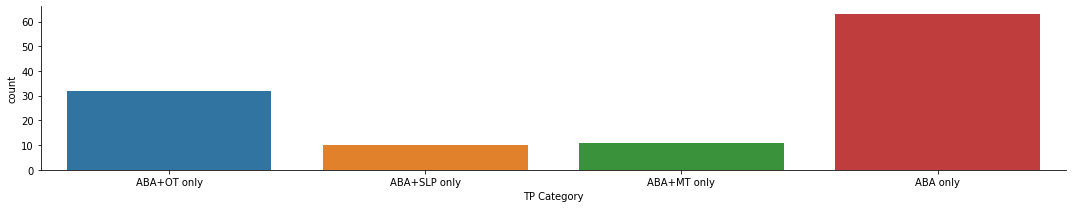

In [18]:

   
g = sns.catplot('TP Category',data=OT_SLP_MT, height=3, aspect=5, kind="count",orient="h" )
plt.tight_layout()


plt.savefig("Overview of different therapies stat") 

## combine with the Vinelabd score

In [88]:
last_testdate=vineland_df.groupby(['name'])[['test date']].max()  


vineland_lastsc=[]
for ind in np.arange(0,len(last_testdate)):
    
    tmp=vineland_df[(vineland_df['name']==last_testdate.index[ind]) & (vineland_df['test date']==", ".join(list(last_testdate.values[ind])))]
    if ind<1:
        vineland_lastsc=tmp
    else:
        vineland_lastsc=vineland_lastsc.append(tmp, ignore_index=True)

In [89]:
now = pd.to_datetime("now")

vineland_lastsc['dob'] = vineland_lastsc['dob'].where(vineland_lastsc['dob'] < now, vineland_lastsc['dob'] -  np.timedelta64(100, 'Y'))   # 2
vineland_lastsc['age'] = (now - vineland_lastsc['dob']).astype('<m8[Y]')    # 3


In [90]:
ABA_DT_Corr=pd.merge(Stat_ABA_DT,vineland_lastsc,on='name')[['phenotype','total_appts_to_date', 'name','TP category', 'gender_y','abc_composite', 'communication', 'daily_living_skills', 'motor_skills', 'socialization', 'age']]

In [91]:
ABA_DT_Corr

,phenotype,total_appts_to_date,name,TP category,gender_y,abc_composite,communication,daily_living_skills,motor_skills,socialization,age
0,None,174.0,MATTHEW_BROOKS,ABA only,Male,94.0,98.0,102.0,NaN,87.0,12.0
1,None,4.0,ETHAN_HOU,ABA only,Male,60.0,74.0,57.0,NaN,38.0,13.0
2,C2,15.0,RICHARD_BURRITT,ABA only,Male,34.0,29.0,31.0,NaN,29.0,22.0
3,None,21.0,FLETCHER_RATLIFF,ABA only,Male,65.0,68.0,59.0,76.0,62.0,10.0
4,B2,21.0,SPARROW_RATLIFF,ABA only,Male,69.0,71.0,74.0,73.0,62.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
280,None,33.0,CASSANDRA_SHAW,ABA+DT,Female,79.0,75.0,92.0,NaN,79.0,17.0
281,None,42.0,PRESTON_TANG,ABA+DT,Male,74.0,86.0,78.0,78.0,62.0,4.0
282,None,7.0,NOAH_WASHINGTON,ABA+DT,Male,96.0,105.0,98.0,NaN,88.0,11.0
283,None,65.0,LAUHITH_BONDA,ABA+DT,Male,88.0,102.0,84.0,NaN,87.0,5.0


In [778]:
ABA_OT_SLP_MT=pd.merge(OT_SLP_MT,vineland_lastsc,on='name')[['phenotype','total_appts_to_date', 'name','TP Category', 'gender_y','abc_composite', 'communication', 'daily_living_skills', 'motor_skills', 'socialization', 'age']]


Text(0.5, 1.0, 'ABA and SLP_OT_MT')

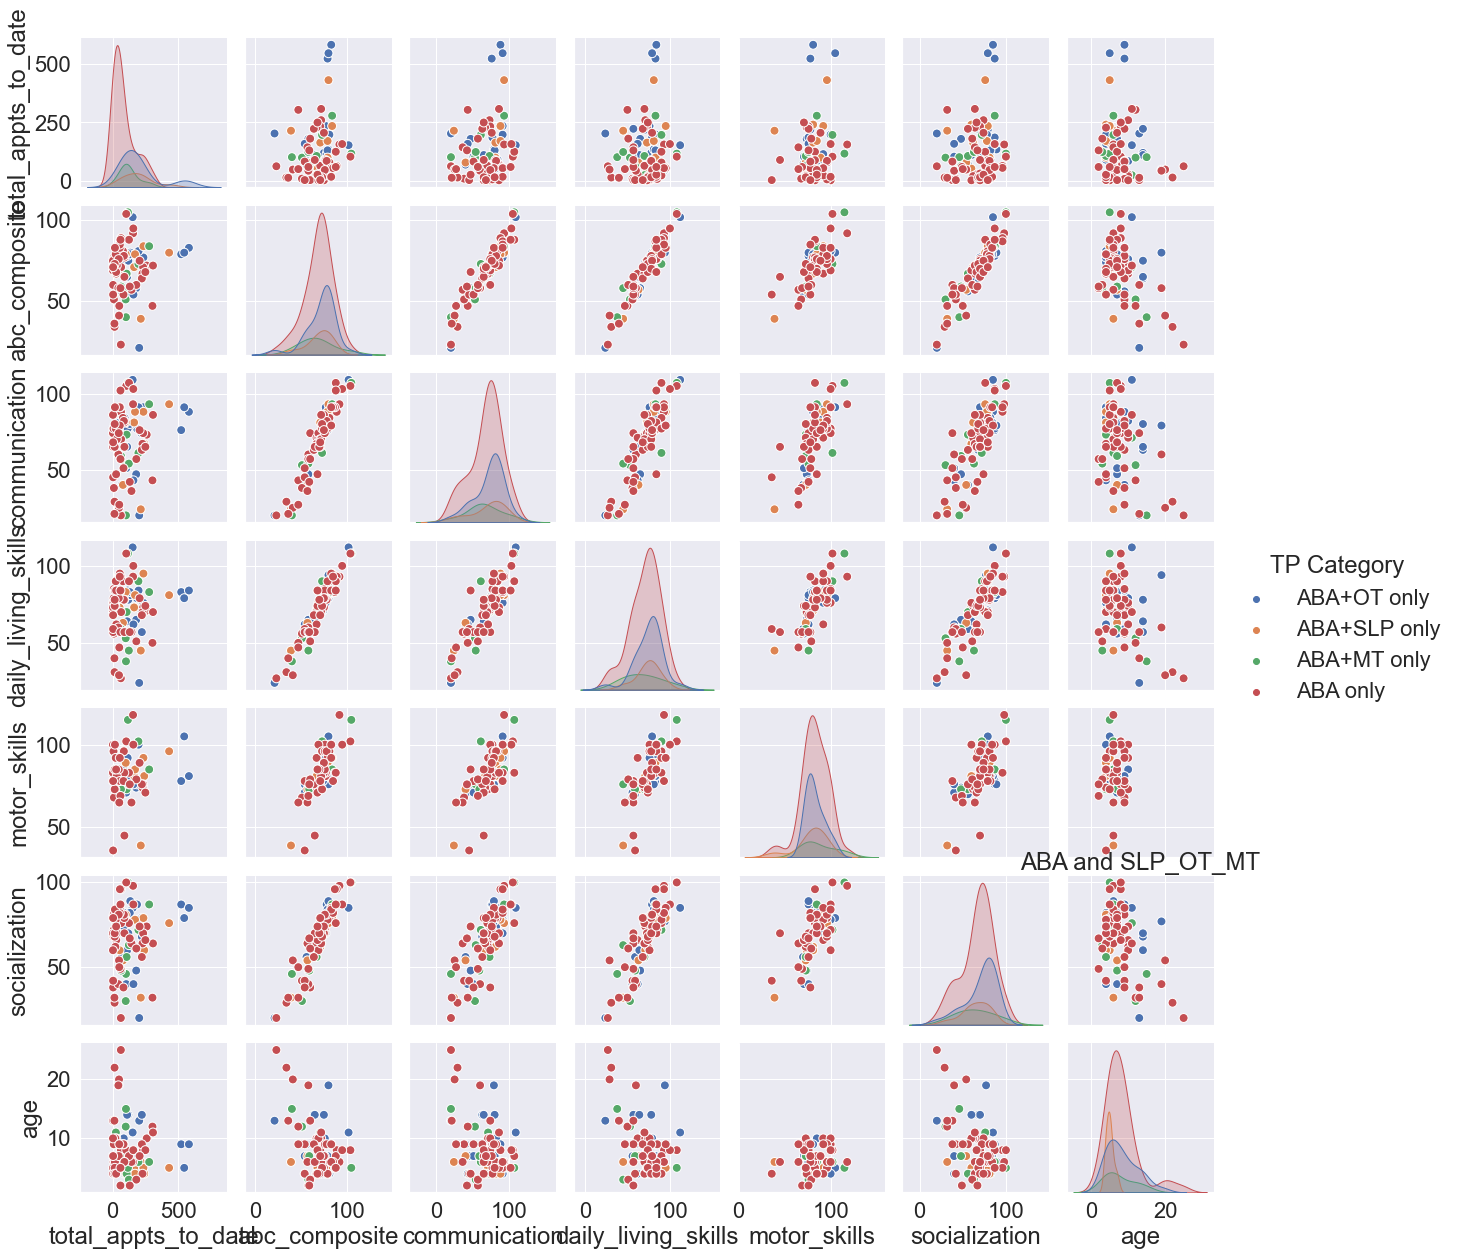

In [779]:
sns.color_palette("Set2")
sns.pairplot(ABA_OT_SLP_MT,hue='TP Category',diag_kind='kde',plot_kws=dict(s=80, edgecolor="w", linewidth=1))


plt.title('ABA and SLP_OT_MT')
#plt.savefig("") 

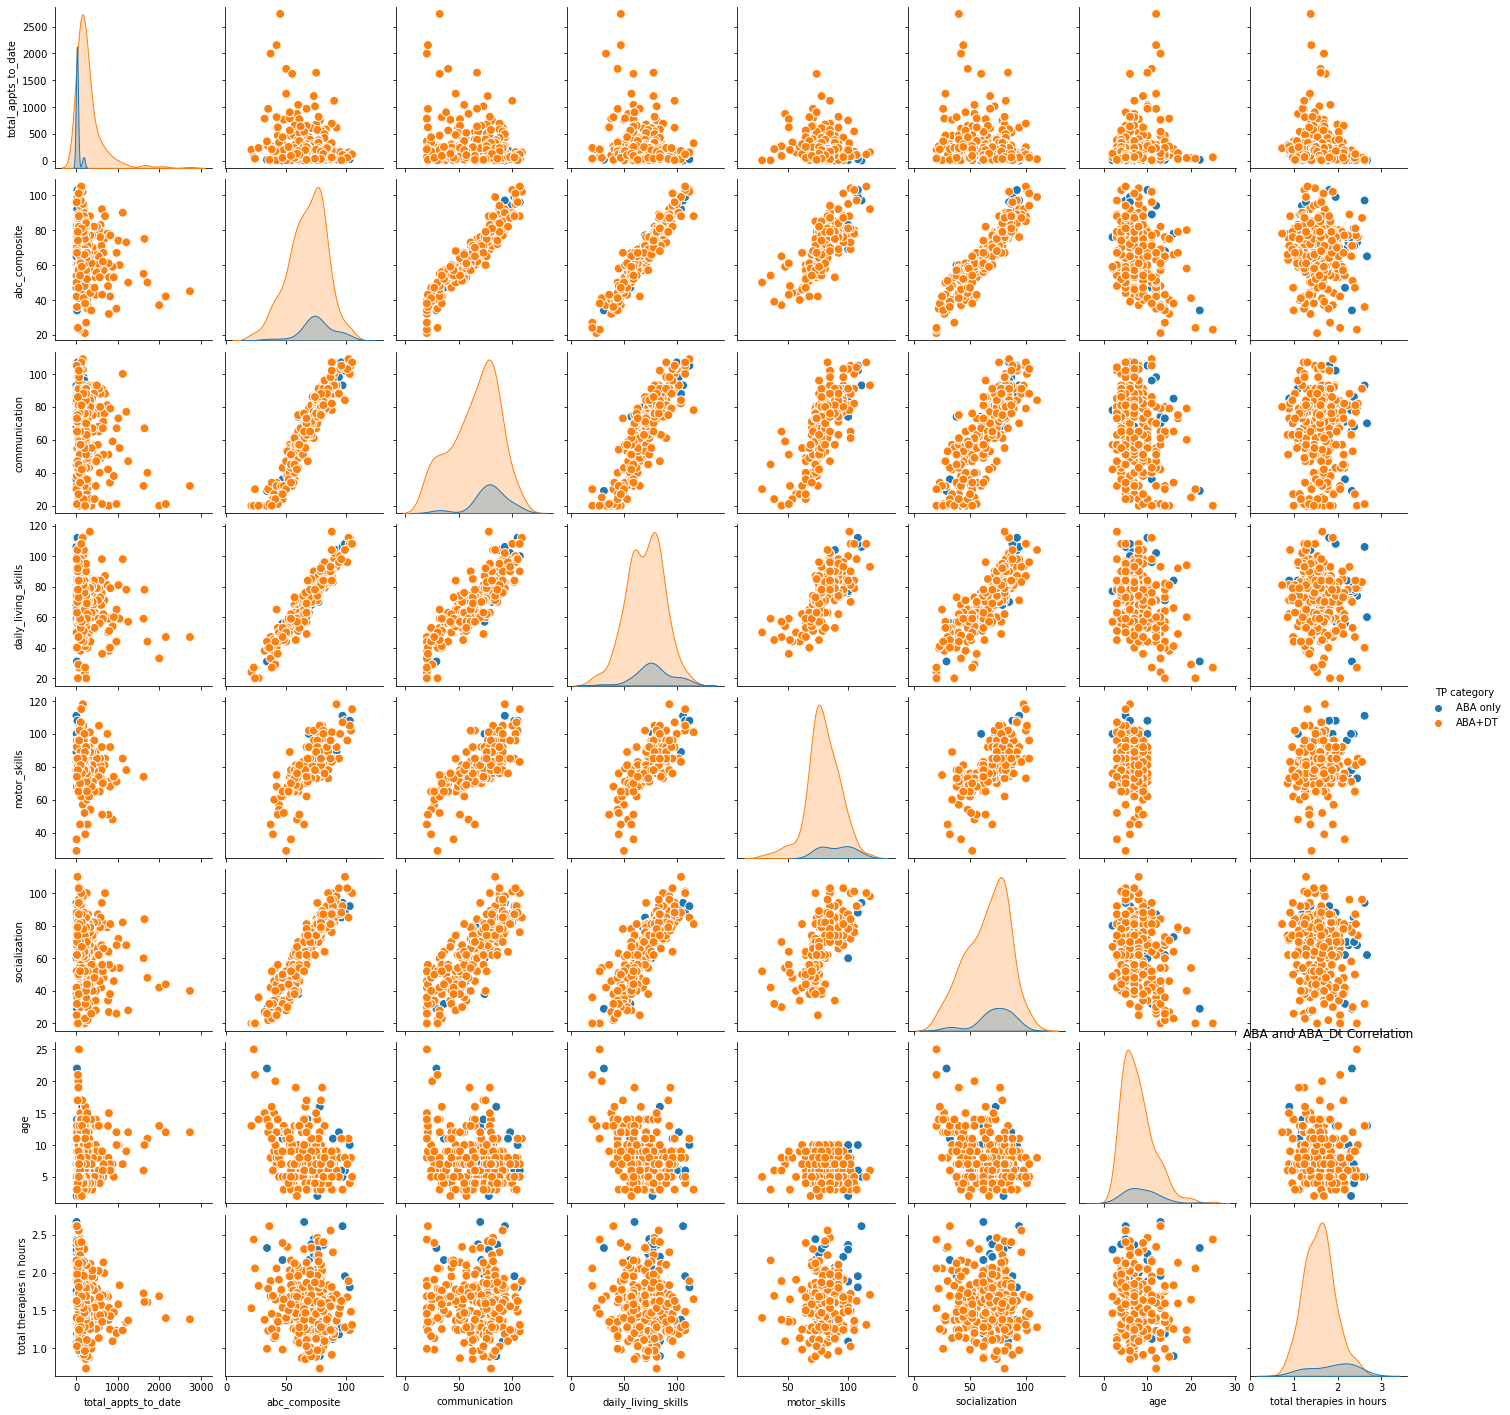

In [163]:

sns.color_palette("Set2")
sns.pairplot(ABA_DT_Corr,hue='TP category',diag_kind='kde',plot_kws=dict(s=80, edgecolor="w", linewidth=1))


plt.title('ABA and ABA_Dt Correlation')
plt.savefig("ABA vs ABA_DT") 

## Find ABA hours for each patient

In [57]:
tmp=app_srv[app_srv['appointment_type_name']=='ABA']

aba_tmp=tmp.groupby(['client_fk','week_end_date'])['hours'].sum().reset_index()
ABA_hours=aba_tmp.groupby(['client_fk'])['hours'].mean().reset_index()

ABA_hours.rename(columns={'hours':'weekly averaged aba hours'}, inplace=True)

In [87]:
tmp['hours'].sum()

268835.93

## ABA hours with NIF data

In [58]:
ABA_ABA_DT=pd.merge(Stat_ABA_DT,ABA_hours,on='client_fk')

In [66]:
df=ABA_ABA_DT[['weekly averaged aba hours','total_appts_to_date','client_fk']].describe()
df.to_excel("stat_table.xlsx") 

In [78]:
ABA_ABA_DT['TP category'].value_counts()

ABA+DT      432
ABA only     63
Name: TP category, dtype: int64

In [74]:
ABA_ABA_DT[['client_fk','phenotype']].notnull().sum()

client_fk    495
phenotype    151
dtype: int64

# ABA vs ABA+DT by ABA hours

<function matplotlib.pyplot.show(close=None, block=None)>

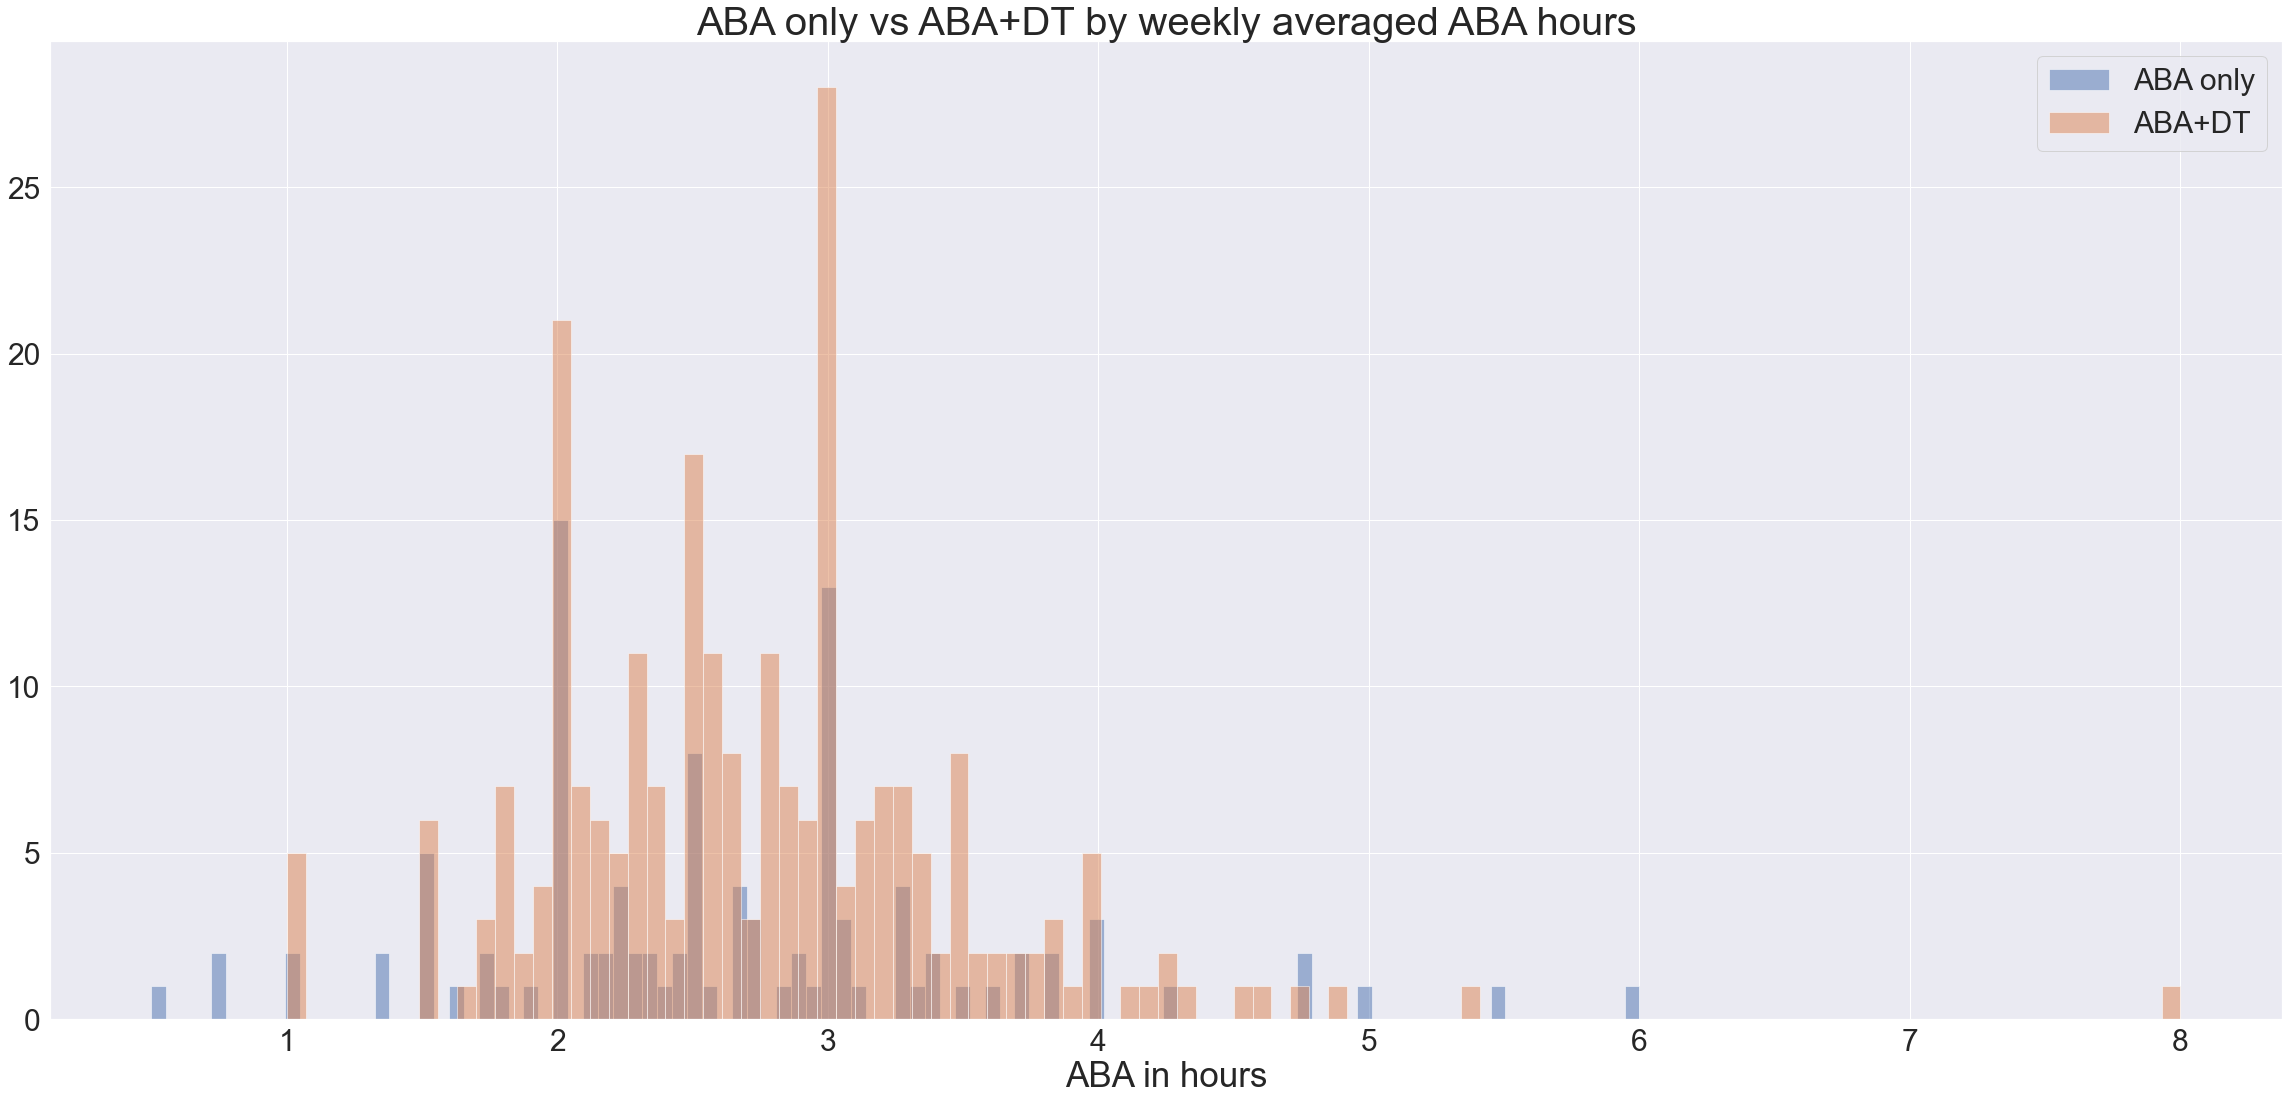

In [822]:



plt.figure(figsize=(40,18))
plt.hist(ABA_ABA_DT[ABA_ABA_DT['TP category']=='ABA only']['weekly averaged aba hours'], bins=100, alpha=0.5, label="ABA only")
plt.hist(ABA_ABA_DT[ABA_ABA_DT['TP category']=='ABA+DT']['weekly averaged aba hours'], bins=100, alpha=0.5, label="ABA+DT")
plt.legend(["ABA only","ABA+DT"], fontsize=30)
plt.xlabel('ABA in hours', fontsize=35)
plt.title('ABA only vs ABA+DT by weekly averaged ABA hours', fontsize=40)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.savefig("ABA only vs ABA+DT by Mean ABA per week hours Histogram")   
plt.show





## parent training and aba hours

<function matplotlib.pyplot.show(close=None, block=None)>

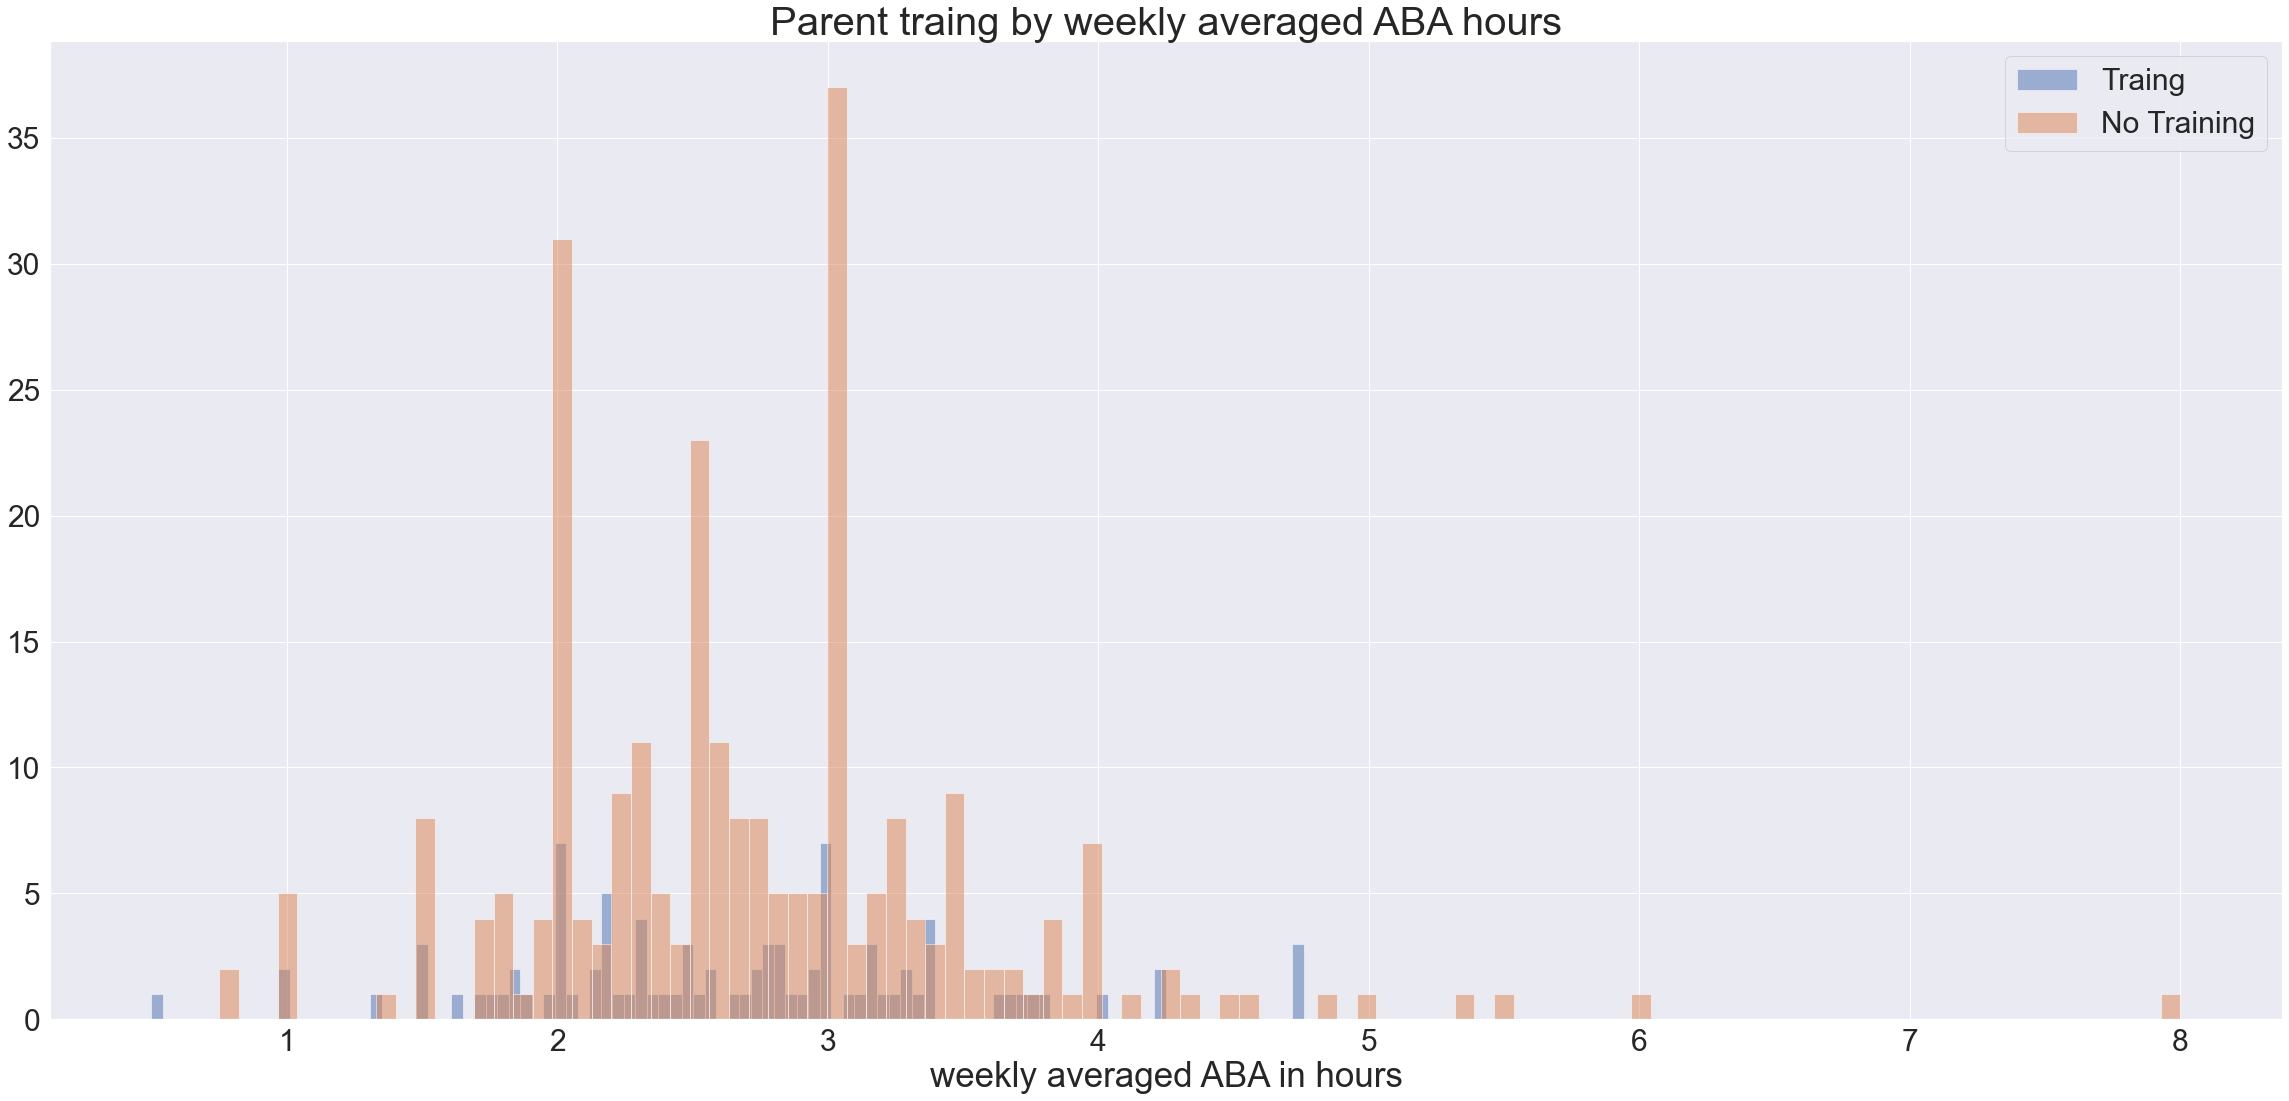

In [823]:



plt.figure(figsize=(40,18))
plt.hist(ABA_ABA_DT[ABA_ABA_DT['has_training']==True]['weekly averaged aba hours'], bins=100, alpha=0.5, label="Yes")
plt.hist(ABA_ABA_DT[ABA_ABA_DT['has_training']==False]['weekly averaged aba hours'], bins=100, alpha=0.5, label="No")
plt.legend(["Traing","No Training"], fontsize=30)
plt.xlabel('weekly averaged ABA in hours', fontsize=35)
plt.title('Parent traing by weekly averaged ABA hours', fontsize=40)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.savefig("Parent traing by weekly averagedABA hours Histogram")   
plt.show





In [784]:
ABA_ABA_DT=ABA_ABA_DT.replace({'phenotype' : {  'C2-3 (T)':'C2', 'A1-2 LIM' : 'A1', 'A1 - LIM' : 'A1' ,'B2-3':'B2','A1 - LIM':'A1','B1-2':'B1','C1/C2':'C1','B1-3':'B1','A1.5':'A1','C2-3':'C2','A2-3':'A2','C1-2':'C1','A3 NON':'A3','C2 (T)':'C2','B2/3':'B2'}}, regex=True)
                           
ABA_ABA_DT.replace(to_replace='C2-3 (T)',value='C2',inplace=True)
ABA_ABA_DT.replace(to_replace='C2 (T)',value='C2',inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

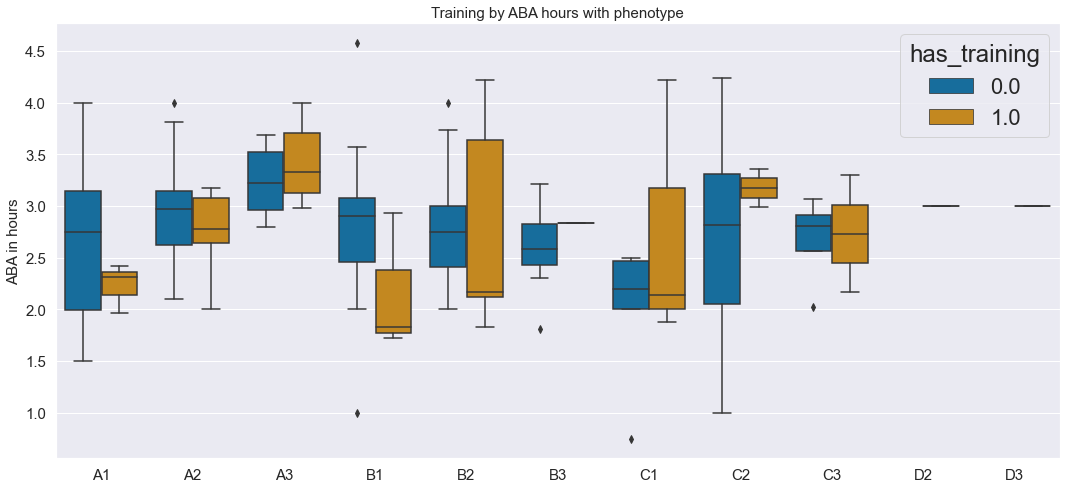

In [786]:
ABA_ABA_DT=ABA_ABA_DT.sort_values('phenotype')
ax, plt.figure(figsize=(18,8))
f1=sns.boxplot(y='weekly averaged aba hours', x='phenotype', data=ABA_ABA_DT,hue='has_training', palette="colorblind")

plt.xlabel('', fontsize=15)
plt.ylabel('ABA in hours', fontsize=15)
plt.title('Training by ABA hours with phenotype', fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.savefig("Training_Boxplot_phenotype") 
plt.show                
           

<function matplotlib.pyplot.show(close=None, block=None)>

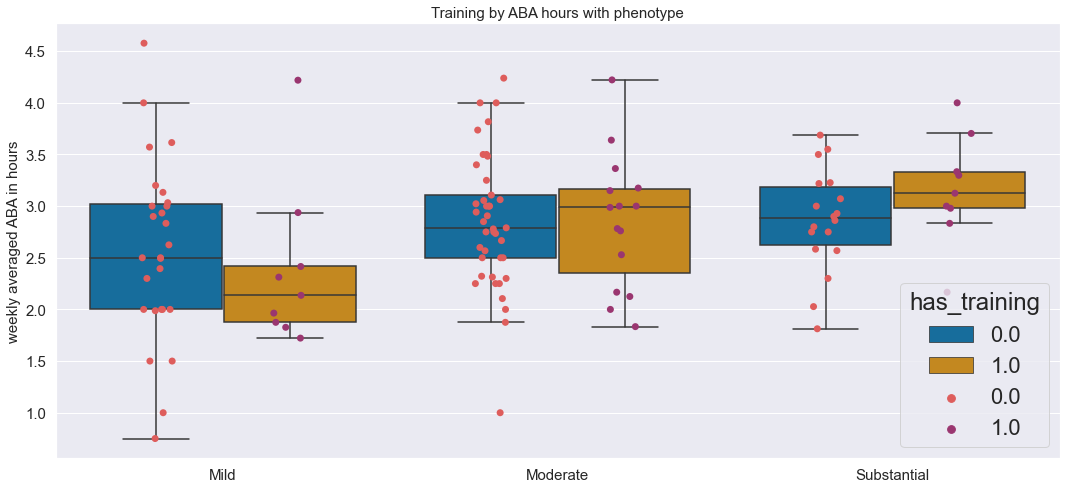

In [821]:

tmp=ABA_ABA_DT.replace({'phenotype' : { 'A1':'Mild', 'B1':'Mild','C1':'Mild' ,'D1':'Mild','A2':'Moderate', 'B2':'Moderate','C2':'Moderate' ,'D2':'Moderate','A3':'Substantial','B3':'Substantial','C3':'Substantial','D3':'Substantial'}}, regex=True)

tmp=tmp.sort_values('phenotype')

ax, plt.figure(figsize=(18,8))
sns.boxplot(y='weekly averaged aba hours', x='phenotype', data=tmp,hue='has_training', palette="colorblind", showfliers = False)

sns.stripplot(y='weekly averaged aba hours', x='phenotype', data=tmp,hue='has_training', palette="flare", size=7, edgecolor="gray", split=True)
                


plt.xlabel('', fontsize=15)
plt.ylabel('weekly averaged ABA in hours', fontsize=15)
plt.title('Training by ABA hours with phenotype', fontsize=15)


plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("severity_Training_Boxplot") 
plt.show                
            

## Before filtering

<function matplotlib.pyplot.show(close=None, block=None)>

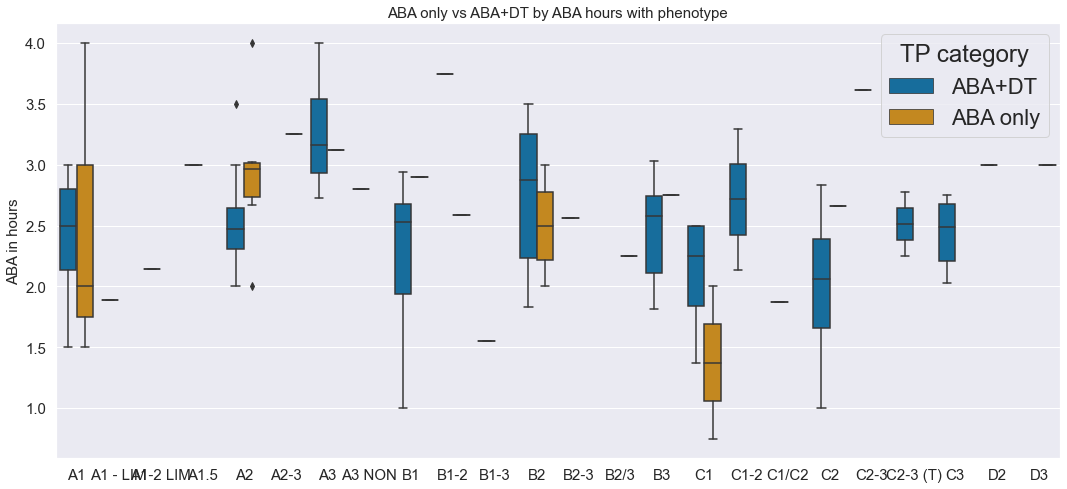

In [752]:
ABA_ABA_DT=ABA_ABA_DT.sort_values('phenotype')
ax, plt.figure(figsize=(18,8))
f1=sns.boxplot(y='aba hours', x='phenotype', data=ABA_ABA_DT,hue='TP category', palette="colorblind")

plt.xlabel('', fontsize=15)
plt.ylabel('ABA in hours', fontsize=15)
plt.title('ABA only vs ABA+DT by ABA hours with phenotype', fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Boxplot_phenotype") 
plt.show                
           

## After filtering

In [753]:
def remove_outlier(df_in, group_name,class_cat,class_type):   
    tmp1=df_in[(df_in['phenotype' ]==group_name) & (df_in[class_type ]==class_cat)]
    q1 = tmp1['aba hours'].quantile(0.25)
    q3 = tmp1['aba hours'].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out=df_in[(df_in['phenotype' ]==group_name)& (df_in[class_type ]==class_cat) & (df_in['aba hours']> fence_low) & (df_in['aba hours']< fence_high) ]
    return df_out

In [340]:
    
list_phen=ABA_ABA_DT['phenotype'].unique()


list_cat=ABA_ABA_DT['TP category'].unique()

for nn,phe in enumerate(list_phen[:-1]):
    for cat in list_cat:
        tmp=remove_outlier(ABA_ABA_DT,phe,cat,'TP category')
    
        if nn<1:
            filtered_df=tmp
        else:
            filtered_df=filtered_df.append(tmp)
        

<function matplotlib.pyplot.show(close=None, block=None)>

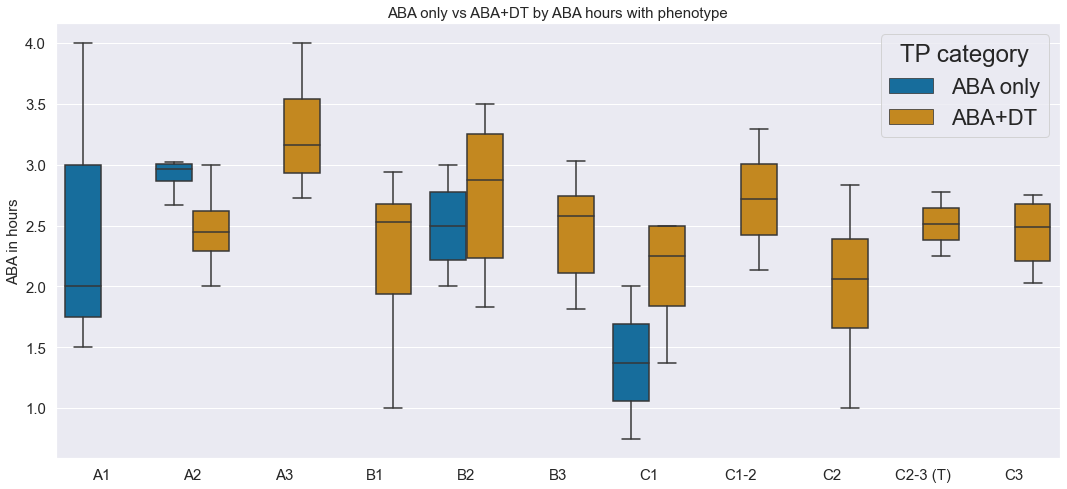

In [754]:




filtered_df=filtered_df.sort_values('phenotype')
ax, plt.figure(figsize=(18,8))
f1=sns.boxplot(y='aba hours', x='phenotype', data=filtered_df,hue='TP category', palette="colorblind")

plt.xlabel('', fontsize=15)
plt.ylabel('ABA in hours', fontsize=15)
plt.title('ABA only vs ABA+DT by ABA hours with phenotype', fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("No_Outlier_ABA only vs ABA+DT by ABA hours with phenotype") 
plt.show                
               

<function matplotlib.pyplot.show(close=None, block=None)>

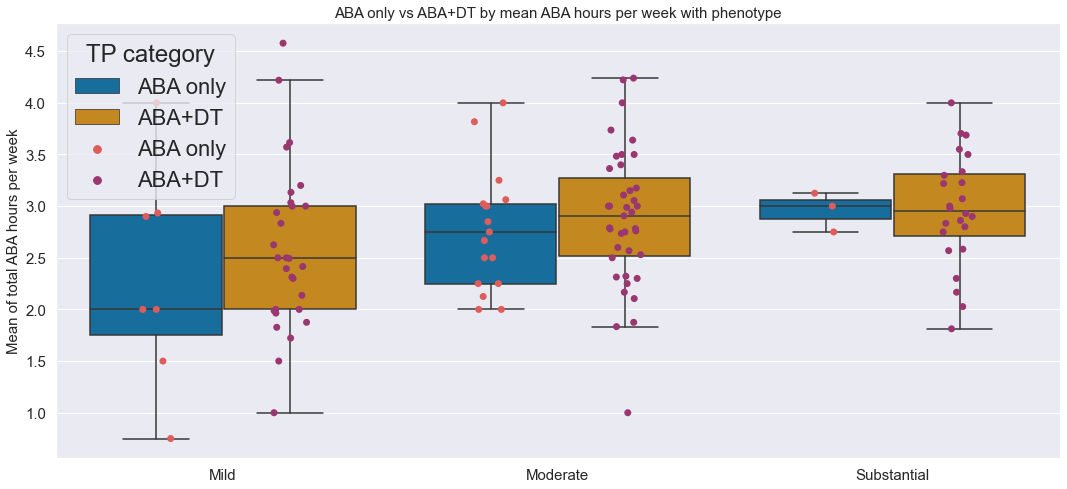

In [819]:
ABA_ABA_DT=ABA_ABA_DT.replace({'phenotype' : {  'C2-3 (T)':'C2', 'A1-2 LIM' : 'A1', 'A1 - LIM' : 'A1' ,'B2-3':'B2','A1 - LIM':'A1','B1-2':'B1','C1/C2':'C1','B1-3':'B1','A1.5':'A1','C2-3':'C2','A2-3':'A2','C1-2':'C1','A3 NON':'A3','C2 (T)':'C2','B2/3':'B2'}}, regex=True)
                           
ABA_ABA_DT.replace(to_replace='C2-3 (T)',value='C2',inplace=True)
ABA_ABA_DT.replace(to_replace='C2 (T)',value='C2',inplace=True)

tmp=ABA_ABA_DT.replace({'phenotype' : { 'A1':'Mild', 'B1':'Mild','C1':'Mild' ,'D1':'Mild','A2':'Moderate', 'B2':'Moderate','C2':'Moderate' ,'D2':'Moderate','A3':'Substantial','B3':'Substantial','C3':'Substantial','D3':'Substantial'}}, regex=True)


tmp=tmp.sort_values('phenotype')
plt.figure(figsize=(18,8))
sns.boxplot(y='weekly averaged aba hours', x='phenotype', data=tmp,hue='TP category', palette="colorblind", showfliers = False)
sns.stripplot(y='weekly averaged aba hours', x='phenotype', data=tmp,hue='TP category', palette="flare", size=7, edgecolor="gray", split=True)

                  
plt.xlabel('', fontsize=15)
plt.ylabel('Mean of total ABA hours per week', fontsize=15)
plt.title('ABA only vs ABA+DT by mean ABA hours per week with phenotype', fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("ABA only vs ABA+DT by mean ABA hours per week by Severity")            
plt.show                


<function matplotlib.pyplot.show(close=None, block=None)>

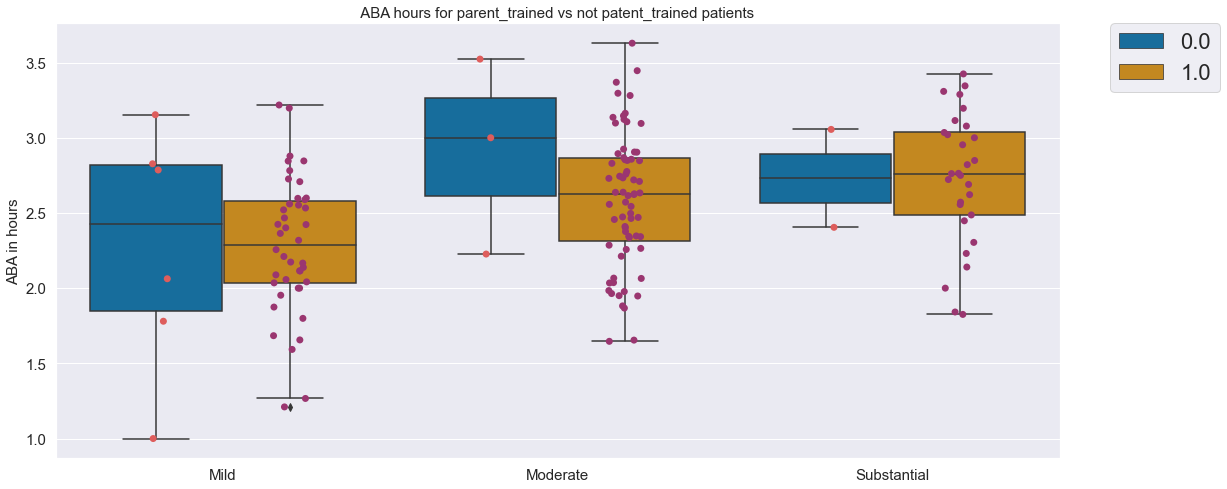

In [636]:

tmp=ABA_ABA_DT.replace({'phenotype' : { 'A1':'Mild', 'B1':'Mild','C1':'Mild' ,'D1':'Mild','A2':'Moderate', 'B2':'Moderate','C2':'Moderate' ,'D2':'Moderate','A3':'Substantial','B3':'Substantial','C3':'Substantial','D3':'Substantial'}}, regex=True)

list_phen=tmp['phenotype'].unique()
list_cat=tmp['has_training'].unique()
nn=0
for phe in list_phen:
    for cat in list_cat:
        temp_df=remove_outlier(tmp,phe,cat,'has_training')
        
        if nn<1:
            filtered_df2=temp_df
            nn=nn+1
        else:
            filtered_df2=filtered_df2.append(temp_df)
            nn=nn+1



filtered_df2=filtered_df2.sort_values('phenotype')
plt.figure(figsize=(18,8))

ax=sns.boxplot(y='aba hours', x='phenotype', data=filtered_df2,hue='has_training', palette="colorblind")
sns.stripplot(y='aba hours', x='phenotype', data=filtered_df2,hue='has_training', palette="flare", size=7, edgecolor="gray", split=True)
                
plt.xlabel('', fontsize=15)
plt.ylabel('ABA in hours', fontsize=15)
plt.title(' ABA hours for parent_trained vs not patent_trained patients ', fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)


handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.show                

#plt.savefig("ABA hours for parent_trained vs not patent_trained patients")            




In [ ]:


ABA_VIN=pd.merge(ABA_ABA_DT,vineland_lastsc,on='name')[['phenotype','total_appts_to_date', 'name','TP category', 'gender_y','abc_composite', 'communication', 'daily_living_skills', 'motor_skills', 'socialization', 'age','aba hours']]

In [ ]:

ABA_VIN=ABA_VIN.sort_values('phenotype')
sns.pairplot(ABA_VIN,hue='phenotype',diag_kind='kde',plot_kws=dict(s=80, edgecolor="w", linewidth=1))
plt.savefig("ABA vineland scores with phenotypes ") 

In [ ]:
plt.figure(figsize=(60,30))
tmp=ABA_VIN.replace({'phenotype' : { 'A1':'Mild', 'B1':'Mild','C1':'Mild' ,'D1':'Mild','A2':'Moderate', 'B2':'Moderate','C2':'Moderate' ,'D2':'Moderate','A3':'Substantial','B3':'Substantial','C3':'Substantial','D3':'Substantial'}}, regex=True)
tmp=tmp.sort_values('phenotype')
sns.pairplot(tmp[['age','abc_composite', 'communication','aba hours','phenotype', 'total_appts_to_date', 'name', 'TP category']],hue='phenotype',diag_kind='kde',plot_kws=dict(s=80, edgecolor="w", linewidth=1))
plt.savefig("ABA vineland scores with severity_part2 ") 

plt.show  

In [ ]:

tmp=ABA_VIN.replace({'phenotype' : { 'A1':'Mild', 'B1':'Mild','C1':'Mild' ,'D1':'Mild','A2':'Moderate', 'B2':'Moderate','C2':'Moderate' ,'D2':'Moderate','A3':'Substantial','B3':'Substantial','C3':'Substantial','D3':'Substantial'}}, regex=True)
tmp=tmp.sort_values('phenotype')
sns.pairplot(tmp[['age','socialization','motor_skills','daily_living_skills','aba hours','phenotype', 'total_appts_to_date', 'name', 'TP category']],hue='phenotype',diag_kind='kde',plot_kws=dict(s=80, edgecolor="w", linewidth=1))
plt.savefig("ABA vineland scores with severity_part1 ") 

plt.show  

In [ ]:

tmp=ABA_VIN.replace({'phenotype' : { 'A1':'Mild', 'B1':'Mild','C1':'Mild' ,'D1':'Mild','A2':'Moderate', 'B2':'Moderate','C2':'Moderate' ,'D2':'Moderate','A3':'Substantial','B3':'Substantial','C3':'Substantial','D3':'Substantial'}}, regex=True)
tmp=tmp.sort_values('phenotype')
sns.pairplot(tmp,hue='phenotype',diag_kind='kde',plot_kws=dict(s=80, edgecolor="w", linewidth=1))
plt.savefig("ABA vineland scores with severity_All ") 

plt.show  

In [ ]:


plt.figure(figsize=(20,8))
plt.hist(ABA_OT_SLP_MT[ABA_OT_SLP_MT['TP Category']=='ABA only']['motor_skills'], bins=100, alpha=0.5, label="ABA only")
plt.hist(ABA_OT_SLP_MT[ABA_OT_SLP_MT['TP Category']=='ABA+OT only']['motor_skills'], bins=100, alpha=0.5, label="ABA+OT")
plt.legend(["ABA only","ABA+OT only"], fontsize=30)
plt.xlabel('Vineland Motor Skill Score', fontsize=35)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.show


## ABA only and ABA+SLP

In [ ]:


plt.figure(figsize=(20,8))
plt.hist(ABA_OT_SLP_MT[ABA_OT_SLP_MT['TP Category']=='ABA only']['socialization'], bins=100, alpha=0.5, label="ABA only")
plt.hist(ABA_OT_SLP_MT[ABA_OT_SLP_MT['TP Category']=='ABA+SLP only']['socialization'], bins=100, alpha=0.5, label="ABA+SLP")
plt.legend(["ABA only","ABA+SLP only"], fontsize=30)
plt.xlabel('Vineland Socialization Score', fontsize=35)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.show


In [ ]:


plt.figure(figsize=(20,8))
plt.hist(ABA_OT_SLP_MT[ABA_OT_SLP_MT['TP Category']=='ABA only']['communication'], bins=100, alpha=0.5, label="ABA only")
plt.hist(ABA_OT_SLP_MT[ABA_OT_SLP_MT['TP Category']=='ABA+MT only']['communication'], bins=100, alpha=0.5, label="ABA+MT")
plt.legend(["ABA only","ABA+MT only"], fontsize=30)
plt.xlabel('Vineland Communication Score', fontsize=35)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.show


## Vineland score over time for mild group

In [745]:

Mild_Score=pd.merge(vineland_df[['name','abc_composite','test date']],ABA_TR[['name','phenotype']],on='name')
Mild_Score=Mild_Score.replace({'phenotype' : {  'C2-3 (T)':'C2', 'A1-2 LIM' : 'A1', 'A1 - LIM' : 'A1' ,'B2-3':'B2','A1 - LIM':'A1','B1-2':'B1','C1/C2':'C1','B1-3':'B1','A1.5':'A1','C2-3':'C2','A2-3':'A2','C1-2':'C1','A3 NON':'A3','C2 (T)':'C2','B2/3':'B2'}}, regex=True)
Mild_Score=Mild_Score.replace({'phenotype' : { 'A1':'Mild', 'B1':'Mild','C1':'Mild' ,'D1':'Mild','A2':'Moderate', 'B2':'Moderate','C2':'Moderate' ,'D2':'Moderate','A3':'Substantial','B3':'Substantial','C3':'Substantial','D3':'Substantial'}}, regex=True)


Mild_Score=Mild_Score[Mild_Score['phenotype']=='Mild'].reset_index()
first_score=Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(0)['abc_composite'].mean()
vfirst_score=Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(0)['abc_composite'].std()/np.sqrt(Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(0).shape[0])

second_score=Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(1)['abc_composite'].mean()
vsecond_score=Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(1)['abc_composite'].std()/np.sqrt(Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(1).shape[0])

third_score=Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(2)['abc_composite'].mean()
vthird_score=Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(2)['abc_composite'].std()/np.sqrt(Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(2).shape[0])


forth_score=Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(3)['abc_composite'].mean()

vforth_score=Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(3)['abc_composite'].std()/np.sqrt(Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(3).shape[0])


A1_scores=[first_score,second_score,third_score,forth_score]
vA1_scores=[vfirst_score,vsecond_score,vthird_score,vforth_score]



In [746]:
vA1_scores

[4.8961107857611115, 5.344155686354955, 6.25642526870234, nan]

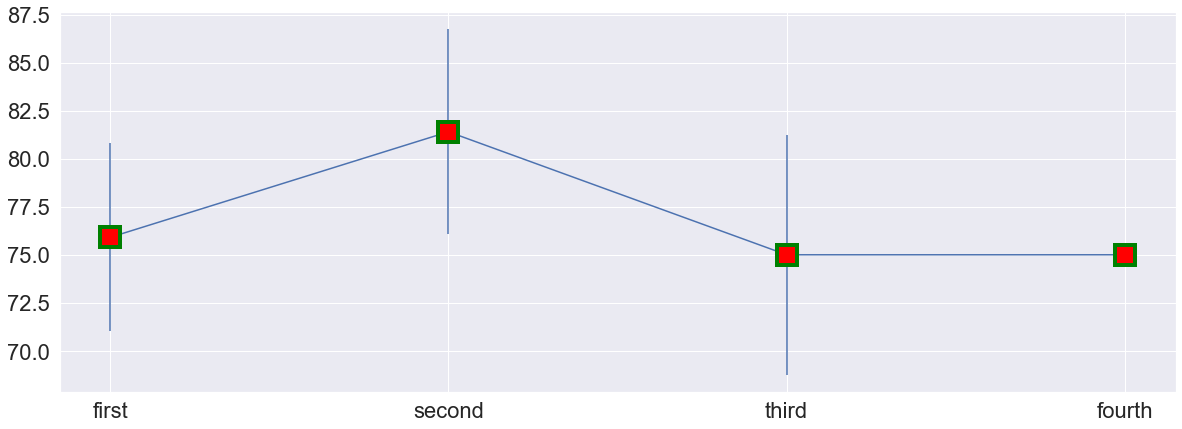

In [748]:
plt.figure(figsize=(20,7))
x=['first','second','third','fourth']

plt.errorbar(x, A1_scores, vA1_scores, marker='s', mfc='red',
         mec='green', ms=20, mew=4)
plt.savefig('WIthErrorbar_Mean_abac_composite score averaged on Mild patients')

In [731]:
vA1_scores

[16.238562408381757, 16.899704139422088, 16.55294535724685, nan]

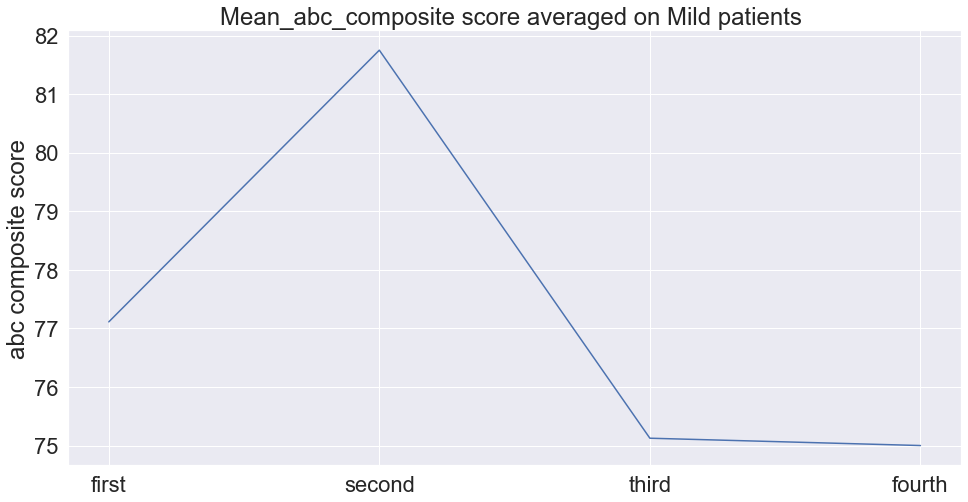

In [657]:

f, ax = plt.subplots( figsize=(16,8))

x=['first','second','third','fourth']
plt.plot(x, A1_scores)
plt.ylabel('abc composite score')
plt.title('Mean_abc_composite score averaged on Mild patients ')
plt.savefig('Mean_abac_composite score averaged on Mild patients')

In [393]:

Vin_Score=pd.merge(vineland_df[['name','abc_composite','test date']],ABA_TR[['name','phenotype']],on='name')
Vin_Score=Vin_Score.replace({'phenotype' : {  'C2-3 (T)':'C2', 'A1-2 LIM' : 'A1', 'A1 - LIM' : 'A1' ,'B2-3':'B2','A1 - LIM':'A1','B1-2':'B1','C1/C2':'C1','B1-3':'B1','A1.5':'A1','C2-3':'C2','A2-3':'A2','C1-2':'C1','A3 NON':'A3','C2 (T)':'C2','B2/3':'B2'}}, regex=True)
Vin_Score=Vin_Score.replace({'phenotype' : { 'A1':'Mild', 'B1':'Mild','C1':'Mild' ,'D1':'Mild','A2':'Moderate', 'B2':'Moderate','C2':'Moderate' ,'D2':'Moderate','A3':'Substantial','B3':'Substantial','C3':'Substantial','D3':'Substantial'}}, regex=True)




Mod_Score=Vin_Score[Vin_Score['phenotype']=='Moderate'].reset_index()
first_score=Mod_Score.sort_values('test date').groupby("name", as_index=False).nth(0)['abc_composite'].median()
second_score=Mod_Score.sort_values('test date').groupby("name", as_index=False).nth(1)['abc_composite'].median()
third_score=Mod_Score.sort_values('test date').groupby("name", as_index=False).nth(2)['abc_composite'].median()
forth_score=Mod_Score.sort_values('test date').groupby("name", as_index=False).nth(3)['abc_composite'].median()

A2_scores=[first_score,second_score,third_score,forth_score]


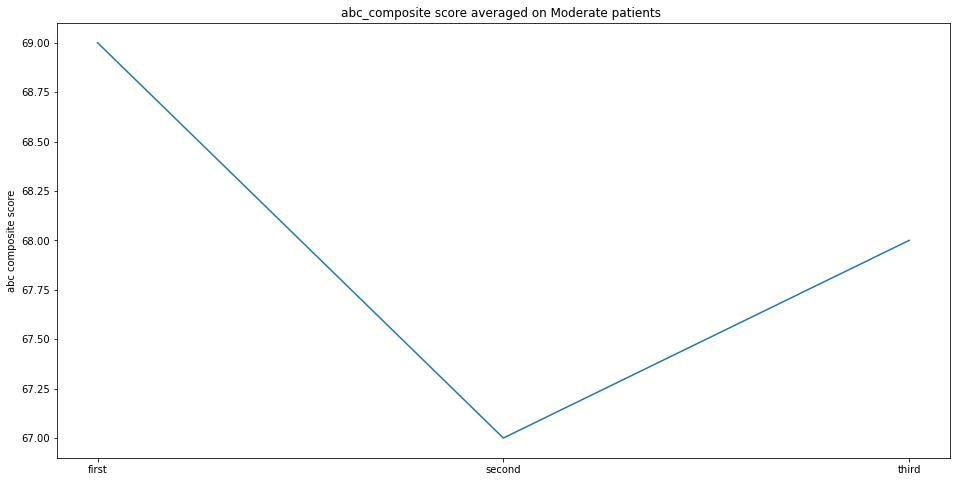

In [388]:

f, ax = plt.subplots( figsize=(16,8))

x=['first','second','third','forth']
plt.plot(x, A2_scores)
plt.ylabel('abc composite score')
plt.title('abc_composite score averaged on Moderate patients ')
plt.savefig('Median_abac_composite score averaged on Moderate patients')

In [ ]:
Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(2)

In [ ]:
Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(1)

## Vieland score over time for ABA or DT pateints 

In [ ]:

Mild_Score=pd.merge(vineland_df[['name','abc_composite','test date']],ABADT_TR[['name','phenotype']],on='name')
Mild_Score=Mild_Score.replace({'phenotype' : {  'C2-3 (T)':'C2', 'A1-2 LIM' : 'A1', 'A1 - LIM' : 'A1' ,'B2-3':'B2','A1 - LIM':'A1','B1-2':'B1','C1/C2':'C1','B1-3':'B1','A1.5':'A1','C2-3':'C2','A2-3':'A2','C1-2':'C1','A3 NON':'A3','C2 (T)':'C2','B2/3':'B2'}}, regex=True)
Mild_Score=Mild_Score.replace({'phenotype' : { 'A1':'Mild', 'B1':'Mild','C1':'Mild' ,'D1':'Mild','A2':'Moderate', 'B2':'Moderate','C2':'Moderate' ,'D2':'Moderate','A3':'Substantial','B3':'Substantial','C3':'Substantial','D3':'Substantial'}}, regex=True)



Mild_Score=Mild_Score[Mild_Score['phenotype']=='Mild'].reset_index()
first_score=Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(0)['abc_composite'].mean()
second_score=Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(1)['abc_composite'].mean()
third_score=Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(2)['abc_composite'].mean()
forth_score=Mild_Score.sort_values('test date').groupby("name", as_index=False).nth(3)['abc_composite'].mean()

A1_scores=[first_score,second_score,third_score,forth_score]

f, ax = plt.subplots( figsize=(16,8))

x=['first','second','third','fourth']
plt.plot(x, A1_scores)
plt.ylabel('abc composite score')
plt.title('ABA_DT_Mild_Mean_abc_composite score averaged on Mild patients ')
plt.savefig('ABA_DT_Mild_Mean_abac_composite score averaged on Mild patients')
